# Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!




In [70]:
import pandas as pd
import os
import zipfile
import openpyxl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [54]:
!pip install --upgrade pandas xlrd



In [50]:
!pip install --upgrade pandas openpyxl


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/11/17/fb1a34f3e73debbc2fd15a01ea17eaab3717943d08463ff4979a4f024b3f/pandas-2.1.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     ------ ------------------------------ 41.0/250.0 kB 653.6 kB/s eta 0:00:01
     ---------------------------------- --- 225.3/250.0 kB 2.8 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.3/10.6 MB 15.4 MB/s eta 0:00:01
   -- ------------------------------------- 0.7/10.6 MB 8.7 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/10.6 MB 9.5 MB/s eta 0:00:01
   ------ --------------------------------- 1.8/10.6 MB 10.5 MB/s eta 0:00:01
   -------- ------------------------------- 2.4/10.6 MB 10.8 MB/s eta 0:00:01
   ----------- --------

In [20]:
import requests
print("timeout = 0.001")
try:
    r = requests.get('https://github.com/', timeout = 0.001)
    print(r.text)
except requests.exceptions.RequestException as e:
    print(e)    

print("\ntimeout = 1.0")    
try:
    r = requests.get('https://github.com/', timeout = 1.0)
    print("Connected....!")
except requests.exceptions.RequestException as e:
    print(e)

timeout = 0.001
HTTPSConnectionPool(host='github.com', port=443): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x00000196A1CE5150>, 'Connection to github.com timed out. (connect timeout=0.001)'))

timeout = 1.0
Connected....!


In [89]:
download_path = ('c:\\Users\\jigya\\Downloads\\winequality-red.zip')
save_path = ('c:\\Users\\jigya\\Desktop\\winequality-red..zip')

In [92]:
import os

file_path = ('c:\\Users\\jigya\\Downloads\\winequality-red.zip')
print(os.path.exists(file_path))


True


In [97]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [98]:
df.shape

(1599, 12)

In [99]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [100]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [105]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [106]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [107]:
df.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: >

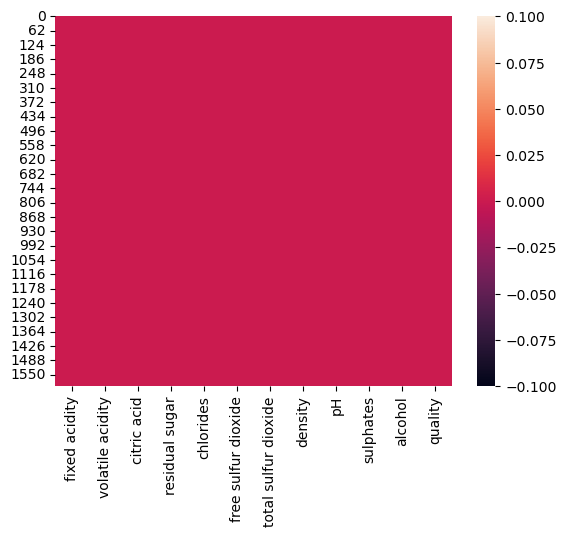

In [108]:
sns.heatmap(df.isnull())

This shows that there is no null data present.

In [109]:
dfcor= df.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

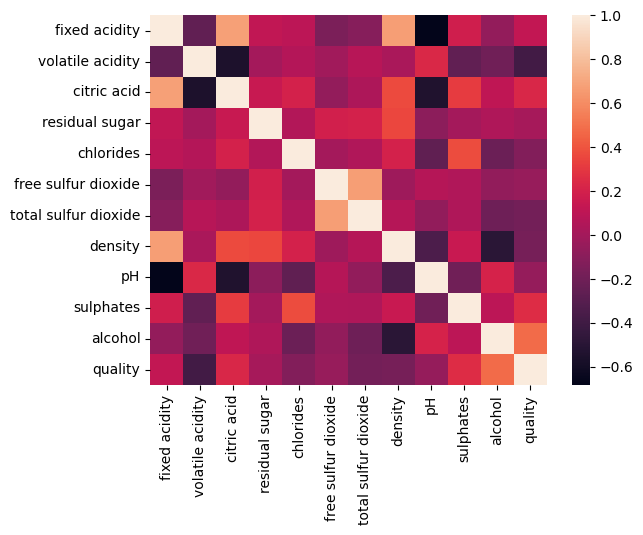

In [110]:
sns.heatmap(dfcor)

In [111]:
df.columns 

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

fixed acidity              Axes(0.125,0.53;0.110714x0.35)
volatile acidity        Axes(0.257857,0.53;0.110714x0.35)
citric acid             Axes(0.390714,0.53;0.110714x0.35)
residual sugar          Axes(0.523571,0.53;0.110714x0.35)
chlorides               Axes(0.656429,0.53;0.110714x0.35)
free sulfur dioxide     Axes(0.789286,0.53;0.110714x0.35)
total sulfur dioxide       Axes(0.125,0.11;0.110714x0.35)
density                 Axes(0.257857,0.11;0.110714x0.35)
pH                      Axes(0.390714,0.11;0.110714x0.35)
sulphates               Axes(0.523571,0.11;0.110714x0.35)
alcohol                 Axes(0.656429,0.11;0.110714x0.35)
quality                 Axes(0.789286,0.11;0.110714x0.35)
dtype: object

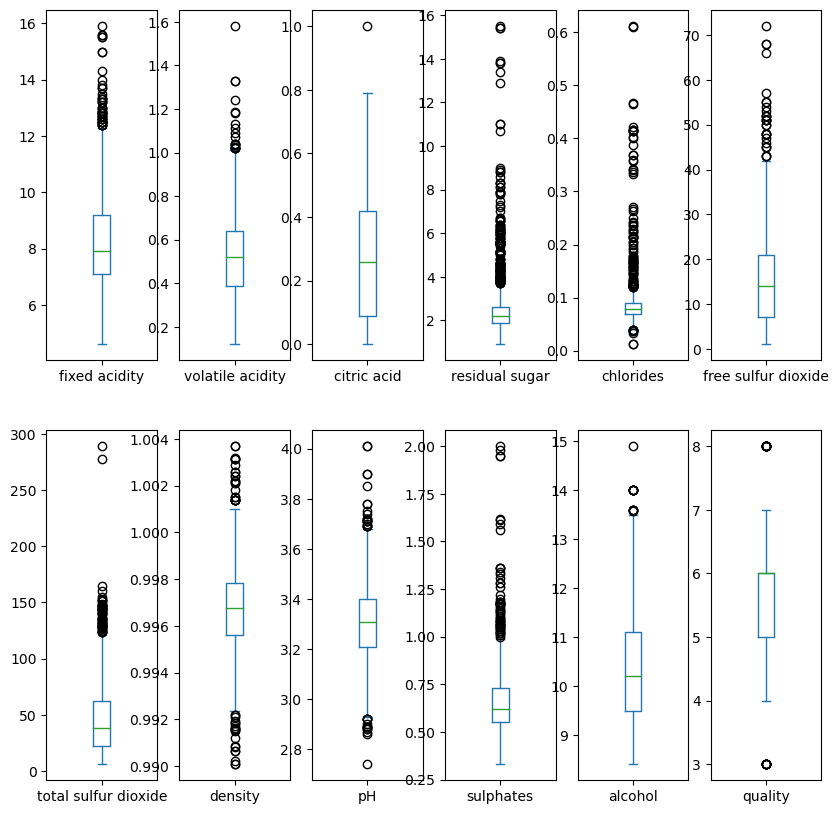

In [113]:
df.plot(kind='box', subplots=True,layout=(2,6),figsize=(10,10))

<Axes: xlabel='density', ylabel='Density'>

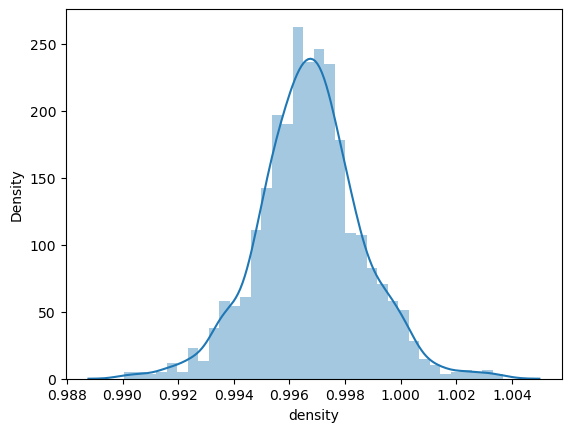

In [114]:
sns.distplot(df['density'])

<Axes: xlabel='citric acid', ylabel='Density'>

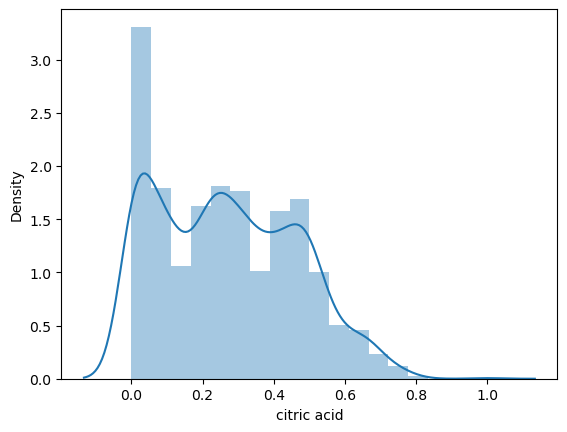

In [117]:
sns.distplot(df['citric acid'])

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

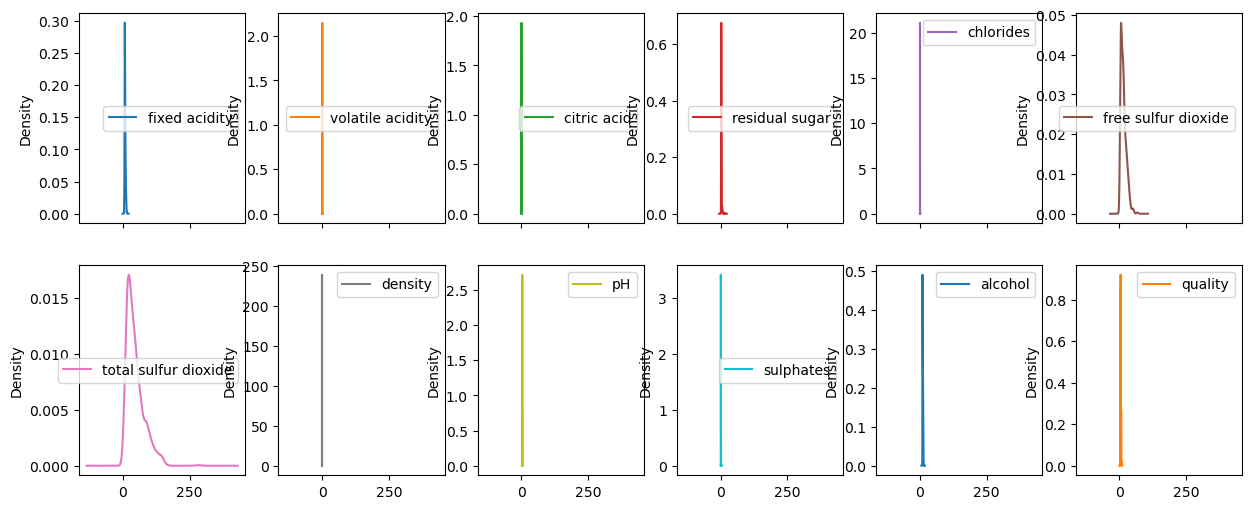

In [122]:
df.plot(kind='kde',subplots= True,layout=(2,6),figsize=(15,6))